In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
X = df.drop(columns='price')
y = df['price']

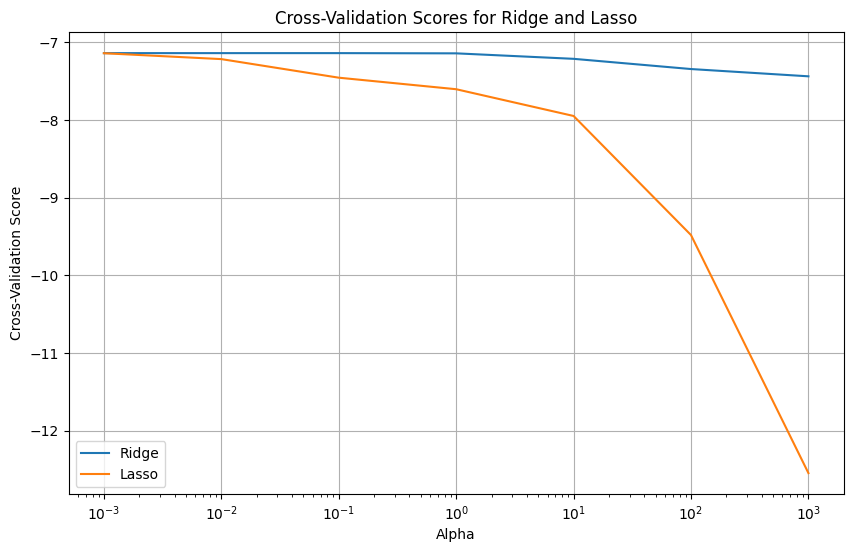

In [9]:
from sklearn.linear_model import Ridge, Lasso

alphas = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
ridge_scores = []
lasso_scores = []

for alpha in alphas:
    
    ridge = Ridge(alpha=alpha)
    ridge_cv_scores = cross_val_score(ridge, X, y, scoring='neg_root_mean_squared_error', cv=5)
    ridge_scores.append(np.mean(ridge_cv_scores))
    

    lasso = Lasso(alpha=alpha)
    lasso_cv_scores = cross_val_score(lasso, X, y, scoring='neg_root_mean_squared_error', cv=5)
    lasso_scores.append(np.mean(lasso_cv_scores))


plt.figure(figsize=(10, 6))

plt.plot(alphas, ridge_scores, label='Ridge')
plt.plot(alphas, lasso_scores, label='Lasso')

plt.xlabel('Alpha')
plt.ylabel('Cross-Validation Score')
plt.title('Cross-Validation Scores for Ridge and Lasso')
plt.xscale('log') 
plt.grid(True)
plt.legend()
plt.show()


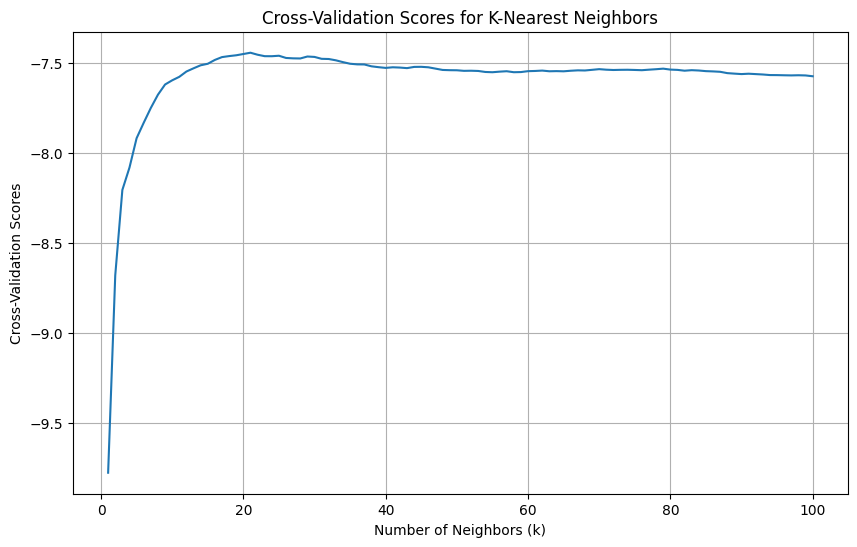

In [10]:
from sklearn.neighbors import KNeighborsRegressor

k_values = range(1, 101)

knn_scores = []

for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn_cv_scores = cross_val_score(knn, X, y, cv=5, scoring='neg_root_mean_squared_error')
    knn_scores.append(np.mean(knn_cv_scores))

plt.figure(figsize=(10, 6))
plt.plot(k_values, knn_scores)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Scores')
plt.title('Cross-Validation Scores for K-Nearest Neighbors')
plt.grid(True)
plt.show()

In [12]:
param_grid = {
    'n_neighbors': [20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'cosine']
}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", grid_search.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 20, 'weights': 'distance'}
Best RMSE: -7.218870817851197


c:\Users\longn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\longn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\longn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\longn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\longn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warni

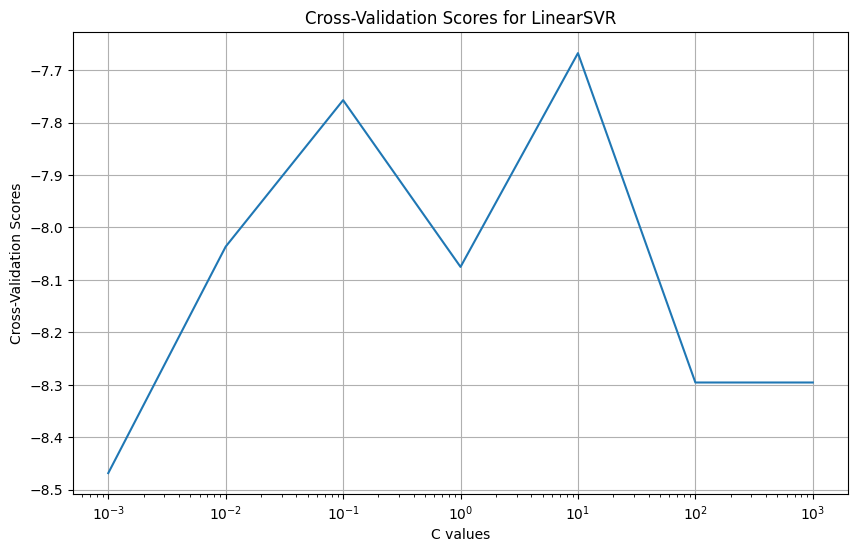

In [16]:
from sklearn.svm import LinearSVR

C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

svr_scores = []

for C in C_values:
    svr = LinearSVR(C=C, random_state=42)
    svr_cv_scores = cross_val_score(svr, X, y, cv=5, scoring='neg_root_mean_squared_error')
    svr_scores.append(np.mean(svr_cv_scores))  


plt.figure(figsize=(10, 6))

plt.plot(C_values, svr_scores,)

plt.xlabel('C values')
plt.ylabel('Cross-Validation Scores')
plt.title('Cross-Validation Scores for LinearSVR')
plt.xscale('log')  
plt.grid(True)
plt.show()

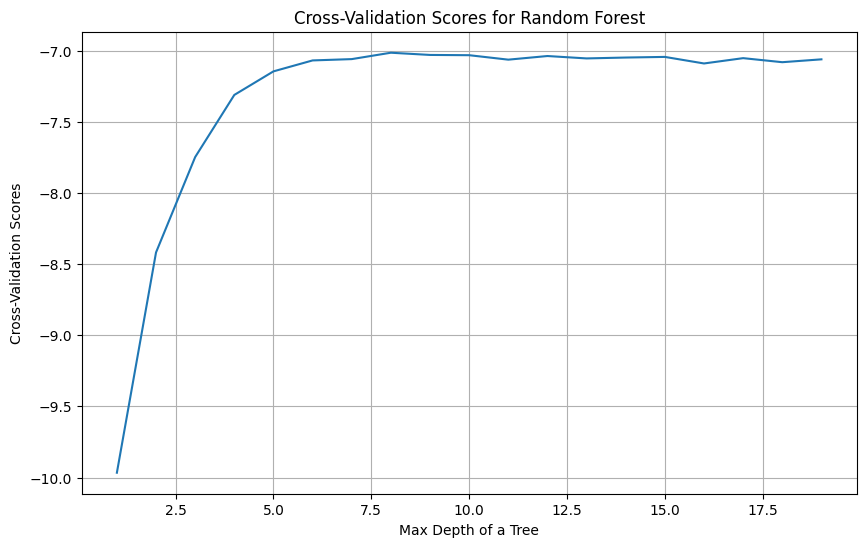

In [9]:
from sklearn.ensemble import RandomForestRegressor

max_depth_values = range(1,20)
rf_scores = []

for max_depth in max_depth_values:
    rf = RandomForestRegressor(max_depth=max_depth)
    rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
    rf_scores.append(np.mean(rf_cv_scores))

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, rf_scores)
plt.xlabel('Max Depth of a Tree')
plt.ylabel('Cross-Validation Scores')
plt.title('Cross-Validation Scores for Random Forest')
plt.grid(True)
plt.show()

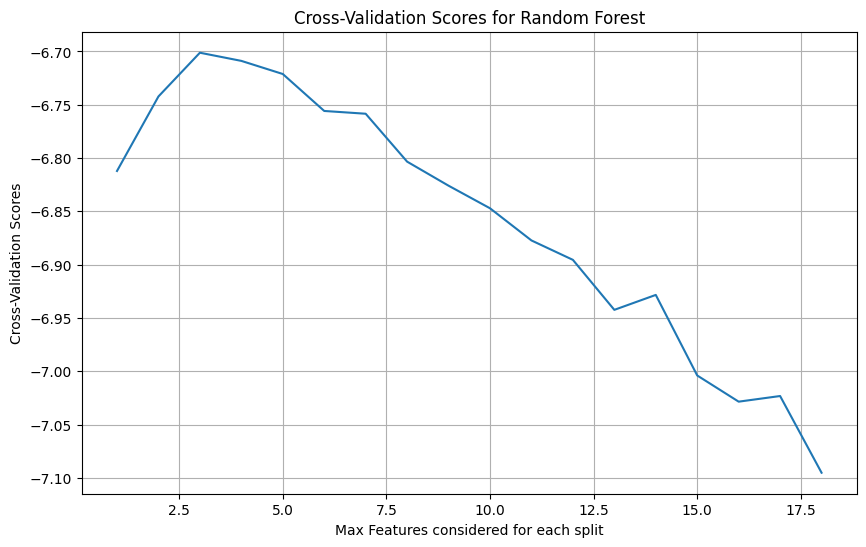

In [13]:
max_features_values = range(1,19)
rf_scores = []

for max_features in max_features_values:
    rf = RandomForestRegressor(max_features=max_features)
    rf_cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_root_mean_squared_error')
    rf_scores.append(np.mean(rf_cv_scores))

plt.figure(figsize=(10, 6))
plt.plot(max_features_values, rf_scores)
plt.xlabel('Max Features considered for each split')
plt.ylabel('Cross-Validation Scores')
plt.title('Cross-Validation Scores for Random Forest')
plt.grid(True)
plt.show()

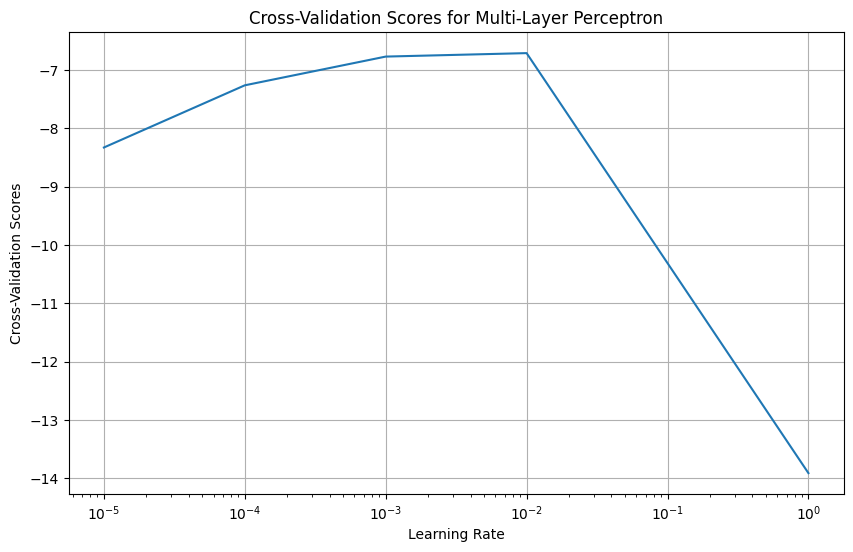

In [16]:
from sklearn.neural_network import MLPRegressor

learning_rate_values = [0.00001, 0.0001, 0.001, 0.01, 1]
mlp_scores = []

for learning_rate in learning_rate_values:
    mlp = MLPRegressor(learning_rate_init=learning_rate)
    mlp_cv_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_root_mean_squared_error')
    mlp_scores.append(np.mean(mlp_cv_scores))

plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, mlp_scores)
plt.xlabel('Learning Rate')
plt.ylabel('Cross-Validation Scores')
plt.title('Cross-Validation Scores for Multi-Layer Perceptron')
plt.grid(True)
plt.xscale('log')
plt.show()

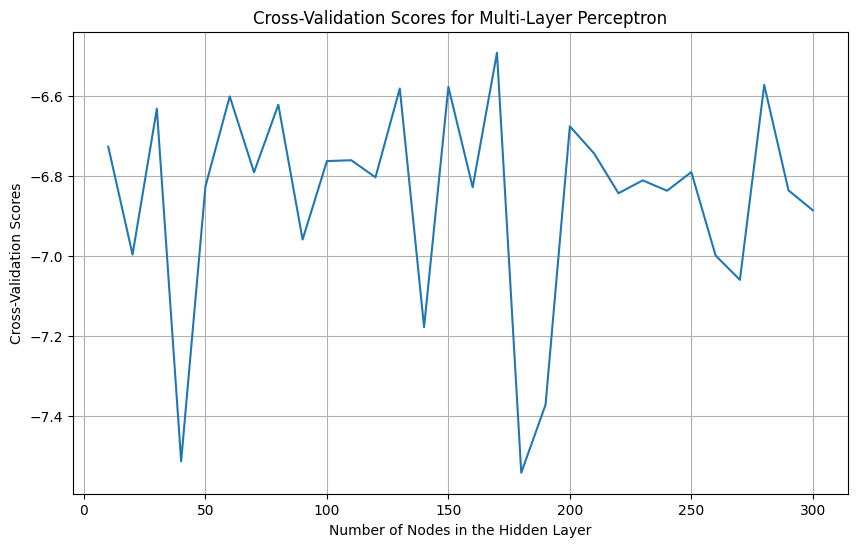

In [8]:
hidden_layer_sizes_values = range(10, 301, 10)
mlp_scores = []

for hidden_layer_sizes in hidden_layer_sizes_values:
    mlp = MLPRegressor(learning_rate_init=0.01, hidden_layer_sizes=(hidden_layer_sizes,))
    mlp_cv_scores = cross_val_score(mlp, X, y, cv=5, scoring='neg_root_mean_squared_error')
    mlp_scores.append(np.mean(mlp_cv_scores))

plt.figure(figsize=(10, 6))
plt.plot(hidden_layer_sizes_values, mlp_scores)
plt.xlabel('Number of Nodes in the Hidden Layer')
plt.ylabel('Cross-Validation Scores')
plt.title('Cross-Validation Scores for Multi-Layer Perceptron')
plt.grid(True)
plt.show()

In [10]:
param_grid = {
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
}

mlp = MLPRegressor(hidden_layer_sizes=(150,), learning_rate_init=0.01)

grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='neg_root_mean_squared_error')
grid_search.fit(X, y)

print("Best parameters:", grid_search.best_params_)
print("Best RMSE:", grid_search.best_score_)

Best parameters: {'activation': 'relu'}
Best RMSE: -6.795586732651271


In [16]:
import joblib

lr = LinearRegression()
knn = KNeighborsRegressor(n_neighbors=2, metric='manhattan', weights='distance')
svm = LinearSVR(C=1, max_iter=10000)
rf = RandomForestRegressor(n_estimators=100, max_depth=8, max_features=3)
mlp = MLPRegressor(hidden_layer_sizes=(150,), activation='relu', learning_rate_init=0.01)\

models = {
    'LinearRegression': lr,
    'KNN': knn,
    'LinearSVR': svm,
    'RandomForest': rf,
    'MLPRegressor': mlp
}

for model_name, model in models.items():
    model.fit(X, y)
    joblib.dump(model, f'trained_models/{model_name}.joblib')

c:\Users\longn\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
